## Zomato Data Analysis

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
td = pd.read_csv('Zomato_data.csv')

In [9]:
td.head()
# this is basically gives us the first five default value

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
td.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

As u can see there are no null values present in the dataset

In [8]:
td.shape

(148, 7)

There are 148 rows and 7 columns

In [12]:
td.dtypes


name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

There are only 2 int types present and other are object

In [13]:
td.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


Converting rate as it as a float value 

In [15]:
td['rate']=td['rate'].str.split('/').str[0].astype(float)

In [19]:
td['rate']
# converted the string value into the float value and also removed the denominator

0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
143    3.3
144    3.3
145    4.0
146    3.0
147    3.9
Name: rate, Length: 148, dtype: float64

In [21]:
td.info()
# this is one of the way to check the if there is any data missing 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Doing describe once again

In [22]:
td.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


#### Rate Analysis:

- Average Rate: The average rate is 3.
- Maximum Rate: The maximum rate observed is 4.6.
- Minimum Rate: The minimum rate observed is 2.6.
- Interpretation: The rate shows some variability, with an average of 3, a range between 2.6 and 4.6. This suggests that while the central tendency (average) is relatively stable, there is a notable spread in the rates.

#### Cost for Two People:

- Minimum Cost: The minimum cost for two people is 100.
- Maximum Cost: The maximum cost for two people is 950.
- Average Cost: The average cost for two people is 418.
- Comparison: The average cost of 418 is approximately 50% of the maximum cost (950). This indicates that while the average cost is a moderate value, the maximum cost is significantly higher, suggesting variability in pricing or cost structures.

#### Analysis Insights:

- Rate Consistency: The average rate provides a good indication of typical values, but the spread (difference between maximum and minimum) suggests there are considerable variations.
- Cost Analysis: The wide range in costs for two people implies that there are both low-cost and high-cost options available. The average being roughly half of the maximum shows that while the typical cost might be moderate, high costs are still present

Text(0.5, 0, 'Type of restaurant')

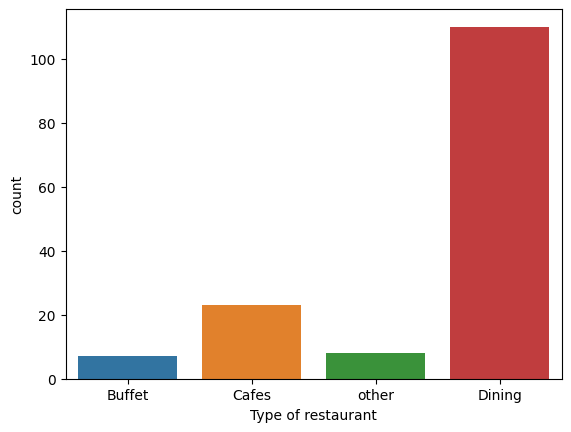

In [63]:
sns.countplot(x=td['listed_in(type)'],hue = 'listed_in(type)' ,data = td )
plt.xlabel("Type of restaurant")

Based on the analysis, we observe that among the four types of restaurants listed, Dining restaurants are clearly the most popular choice. The data indicates that Dining restaurants have a count exceeding 100, which is the highest among all categories. This suggests a strong preference for Dining restaurants over Buffets, Cafés, or other types of dining establishments.

In [33]:
grouped_data = td.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes' : grouped_data})
result

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


#### Dining Restaurants:

- Votes: 20,363
- Observation: Dining restaurants have the highest number of votes, indicating strong popularity and preference among patrons.

#### Other Types:

- Votes: 9,637
- Observation: The 'Other' category holds the second highest number of votes. This category might include various restaurant types or unique establishments not classified elsewhere.

#### Buffet Restaurants:

- Votes: 3,028
- Observation: Buffet restaurants received the fewest votes, suggesting they are less preferred compared to Dining and 'Other' restaurant types.

Text(0, 0.5, 'Votes')

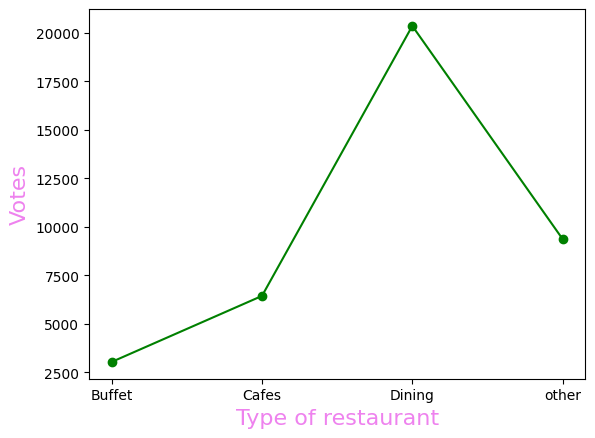

In [42]:
plt.plot(result,c='green',marker = 'o')
plt.show
plt.xlabel("Type of restaurant", c="violet", size=16)
plt.ylabel("Votes", c="violet", size=16)

In [46]:
max_votes = td['votes'].max()
max_votes


4884

the highest vote is 4884

In [51]:
res_with_maximum_votes = td.loc[td['votes'] == max_votes,['name','rate']]
print("Restaurant(s) with the maximum votes:")
print(res_with_maximum_votes)

Restaurant(s) with the maximum votes:
                 name  rate
38  Empire Restaurant   4.4


- The maximum Votes is given to Empire restuarant meaning this restaurant is good and mostly preferred by people with the rating of 4.4

lets explore some more

<Axes: xlabel='online_order', ylabel='count'>

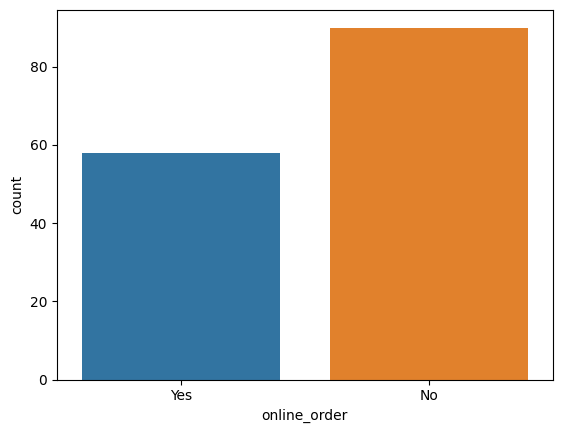

In [65]:
sns.countplot(x=td['online_order'],hue = 'online_order',data = td)

- Restaurant prefer offline_order more as they are not accepting online order 
- some restuarant are accepting online orders

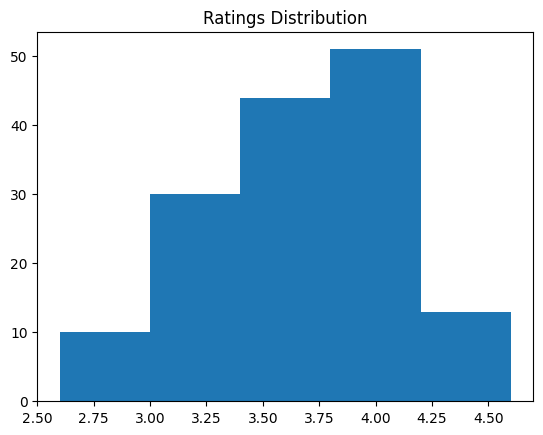

In [56]:
plt.hist(td['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

The majority of restaurants received ratings ranging from 3.5 to 4.

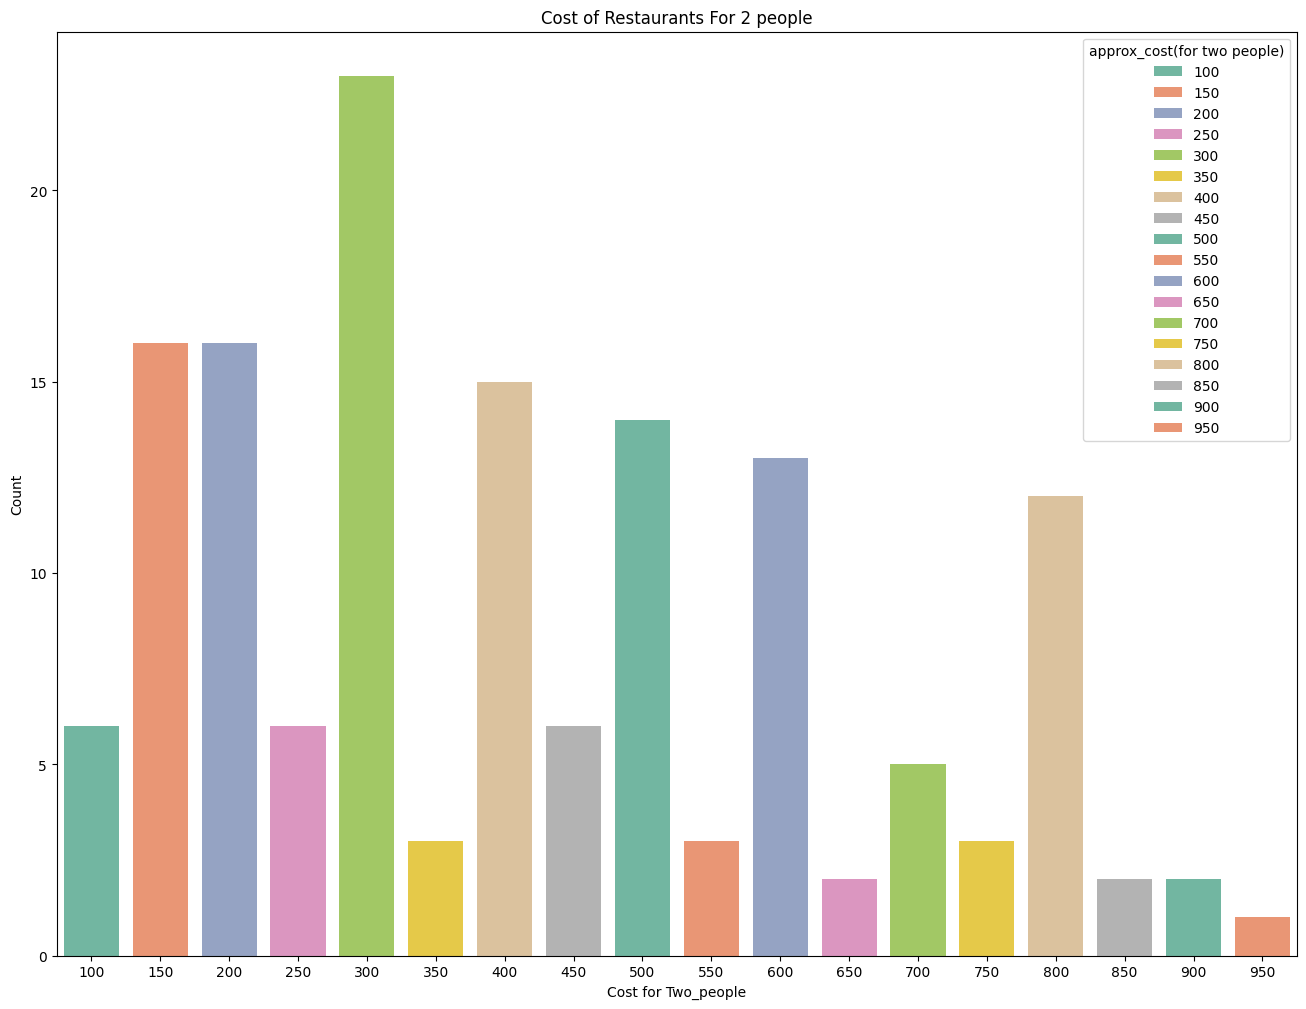

In [80]:
couple_data=td['approx_cost(for two people)']

plt.figure(figsize=(16, 12))

sns.countplot(x=couple_data,hue = couple_data,data = td, palette='Set2')
plt.xlabel("Cost for Two_people")
plt.ylabel("Count")
plt.title("Cost of Restaurants For 2 people")

# Display the plot
plt.show()

The majority of couples prefer restaurants with an approximate cost of 300 rupees.

<Axes: xlabel='online_order', ylabel='rate'>

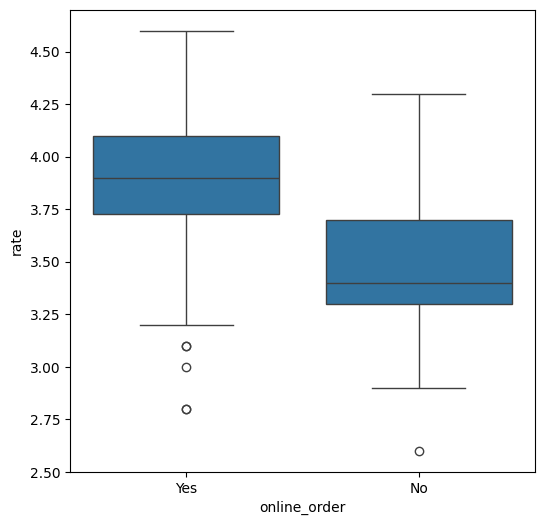

In [61]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = td)


Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

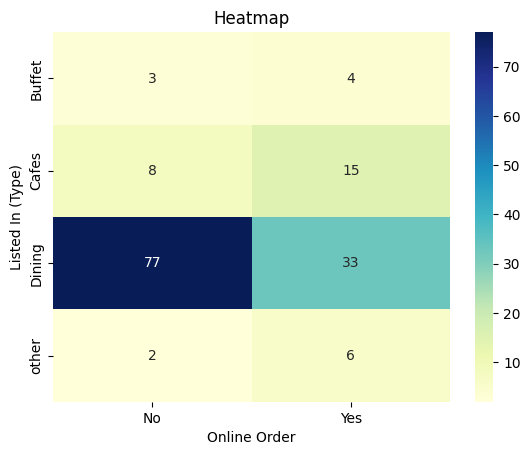

In [62]:
pivot_table = td.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

### CONCLUSION: 

- Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders.
- This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.